Matplotlib is building the font cache; this may take a moment.
/var/folders/j0/7hm8m_b57pd8fgc9rpl5hw000000gn/T/ipykernel_28012/66573365.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)


📈 Correlation Matrix:
                      age  avg_order_value  total_orders  last_purchase  \
age              1.000000         0.001999      0.020640      -0.001528   
avg_order_value  0.001999         1.000000      0.027507       0.022286   
total_orders     0.020640         0.027507      1.000000       0.007690   
last_purchase   -0.001528         0.022286      0.007690       1.000000   
is_fraudulent    0.003242        -0.010311      0.002200      -0.007725   
email_open_rate -0.010422        -0.022002      0.030492      -0.006191   
loyalty_score    0.010880        -0.005072     -0.004911       0.015608   
churn_risk       0.007441         0.002816     -0.001427       0.007632   

                 is_fraudulent  email_open_rate  loyalty_score  churn_risk  
age                   0.003242        -0.010422       0.010880    0.007441  
avg_order_value      -0.010311        -0.022002      -0.005072    0.002816  
total_orders          0.002200         0.030492      -0.004911   -0.001

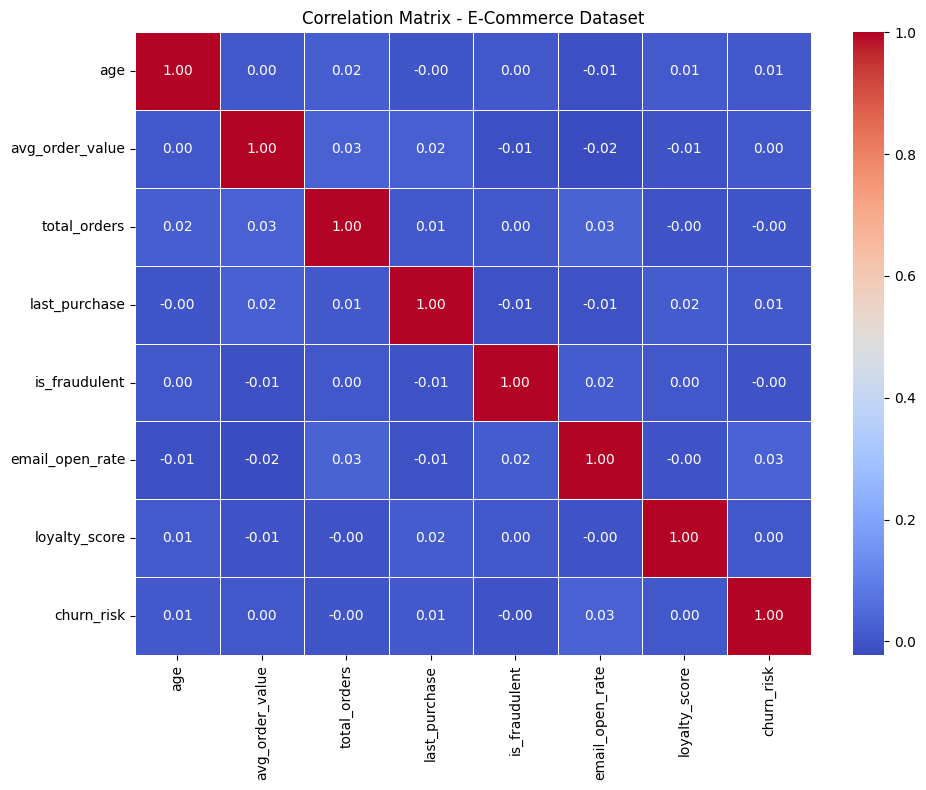

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw CSV from the correct path
df = pd.read_csv('../data/ecommerce.csv')

# If 'customer_since' exists and is a string, convert to datetime
if 'customer_since' in df.columns and df['customer_since'].dtype == 'object':
    df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

# Handle missing values (optional but recommended for correlation)
if 'avg_order_value' in df.columns:
    df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Print correlation values
print("📈 Correlation Matrix:")
print(corr_matrix)

# Save to CSV for future reference
corr_matrix.to_csv('../data/correlation_matrix.csv', index=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix - E-Commerce Dataset")
plt.tight_layout()
plt.show()
